In [1]:
import pandas as pd # Importing pandas library

In [2]:
# Reading the csv file and get the information about the data
house_data = pd.read_csv('kc_house_data.csv')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
# Dropping the columns which are not required
house_data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [4]:
# Checking the data after dropping the columns
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [5]:
# Import the libraries to make the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# Set the data
X = house_data.drop('price', axis=1)
Y = house_data['price']

In [7]:
#  Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [8]:

# Train Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [9]:

# decision_tree.score(x_train, y_train)
print(decision_tree.score(x_test, y_test))

0.5442486120849769


In [10]:
# Import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

correlation = house_data.corr().round(2)
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,0.59,0.08
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,0.39,0.03
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,0.14,0.72
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,0.28,-0.01
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.09,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.28,0.07
condition,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,-0.09,-0.00
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,0.71,0.12


<Axes: >

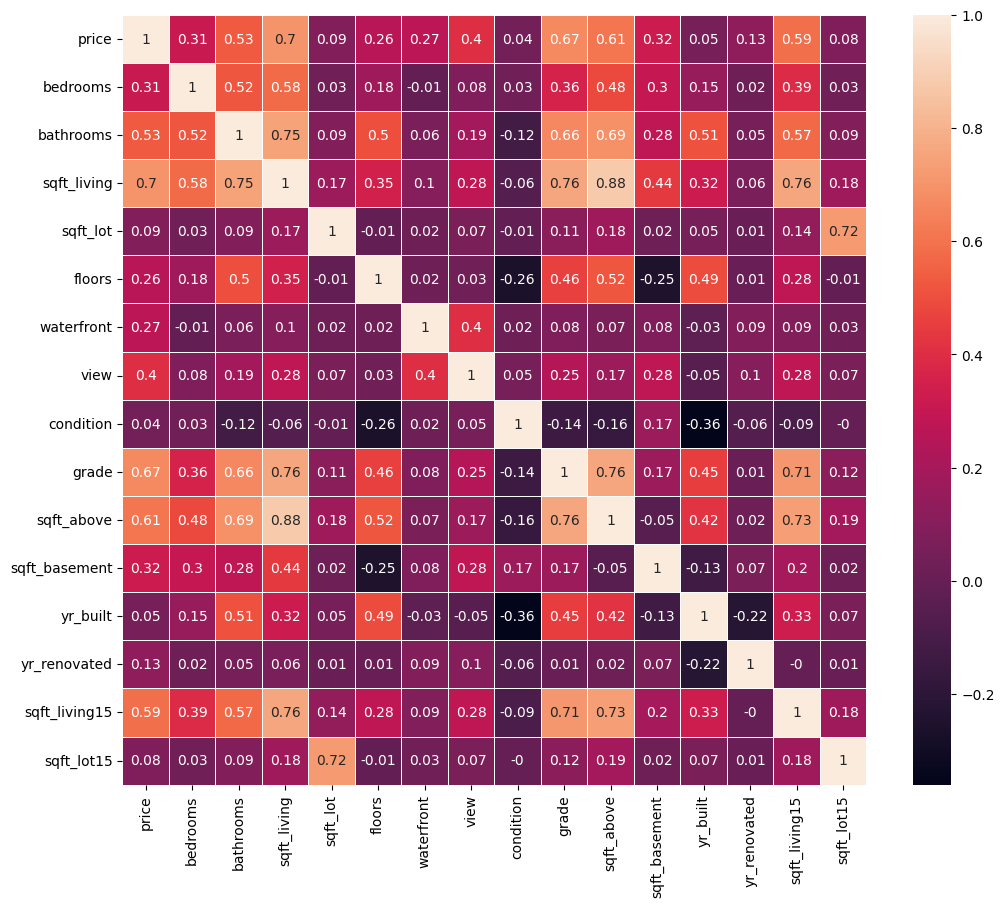

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation, annot=True, linewidths=0.5)

In [13]:
correlation['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
Name: price, dtype: float64

In [14]:
top_features = correlation.index[abs(correlation['price']) > 0.5]

In [15]:
X_PCA = house_data[top_features]
Y_PCA = house_data['price']

In [16]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_PCA, Y_PCA, test_size=0.3, random_state=3)

In [17]:
decision_tree_PCA = DecisionTreeRegressor(max_depth=3)
decision_tree_PCA.fit(X_train_PCA, Y_train_PCA)

DecisionTreeRegressor(max_depth=3)

In [18]:
print(decision_tree_PCA.score(X_test_PCA, Y_test_PCA))

0.9506868119635715
